In [3]:
import numpy as np
import matplotlib.pyplot as plt

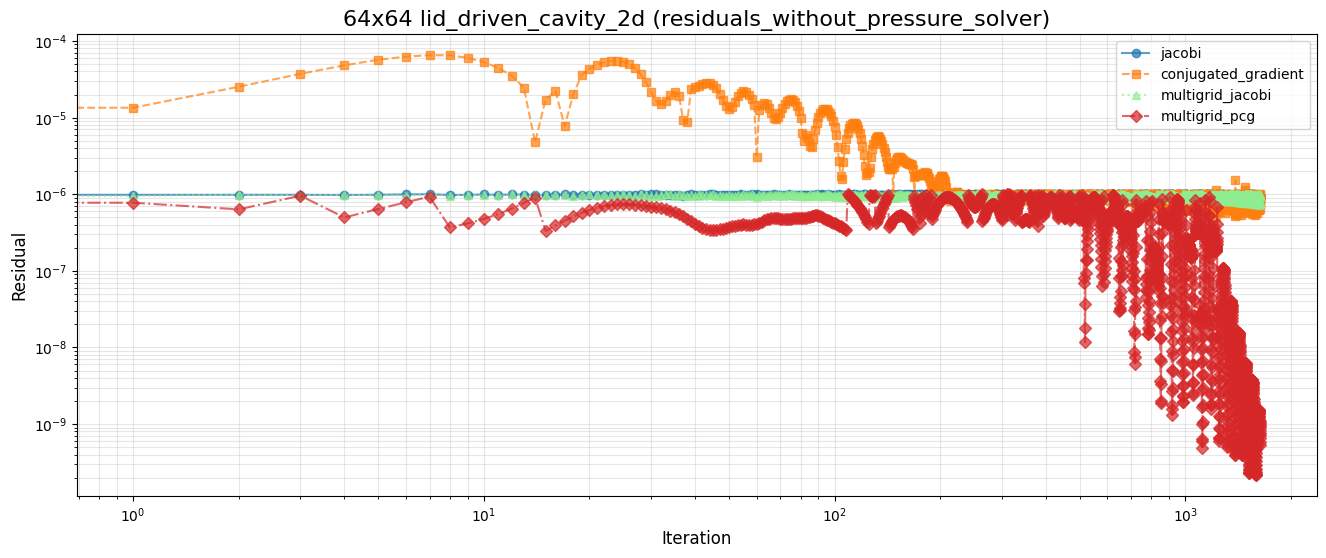

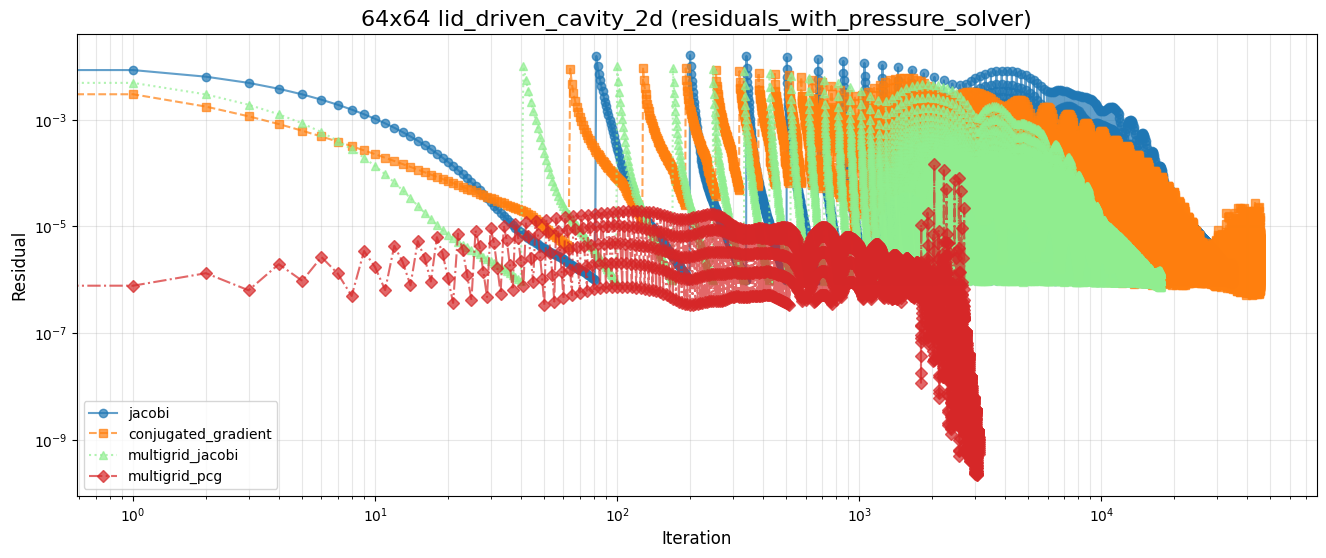

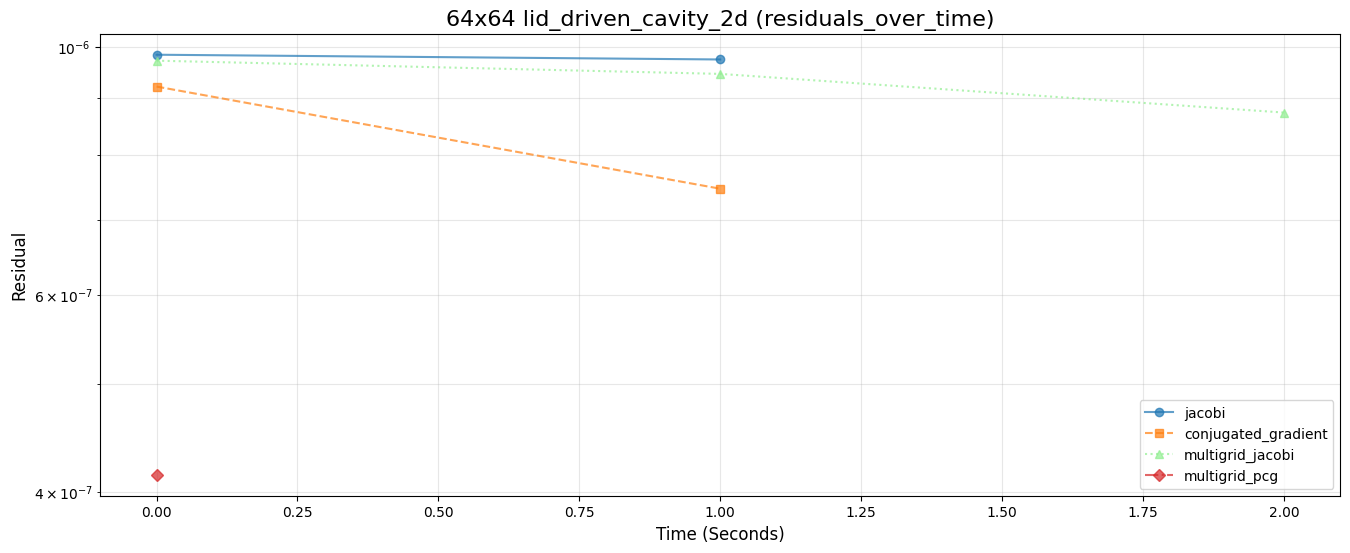

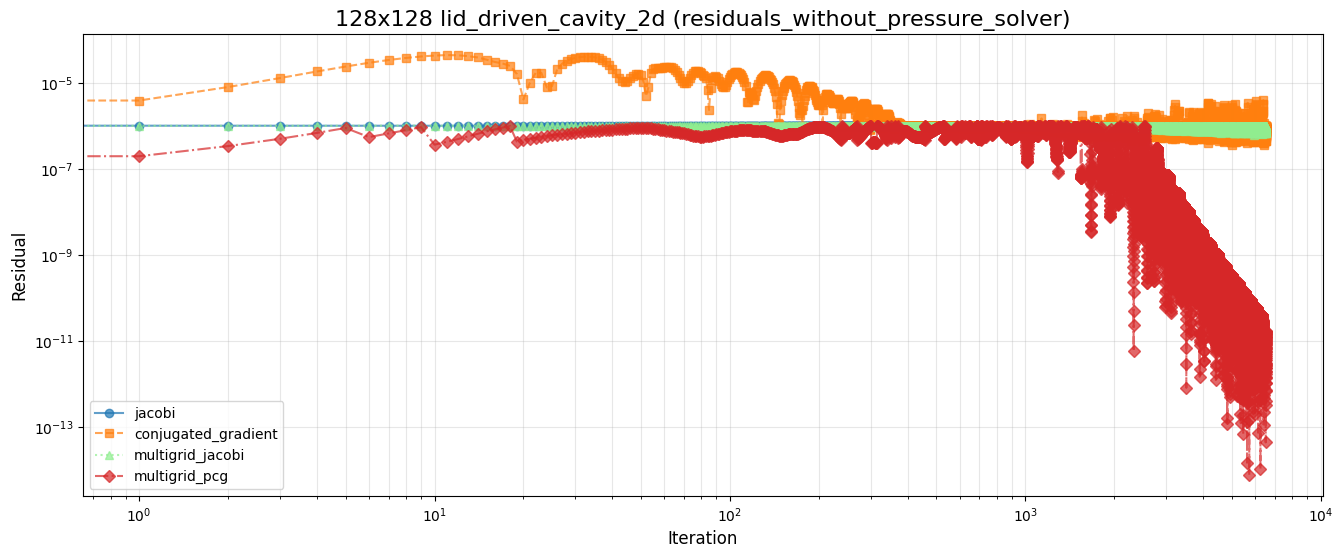

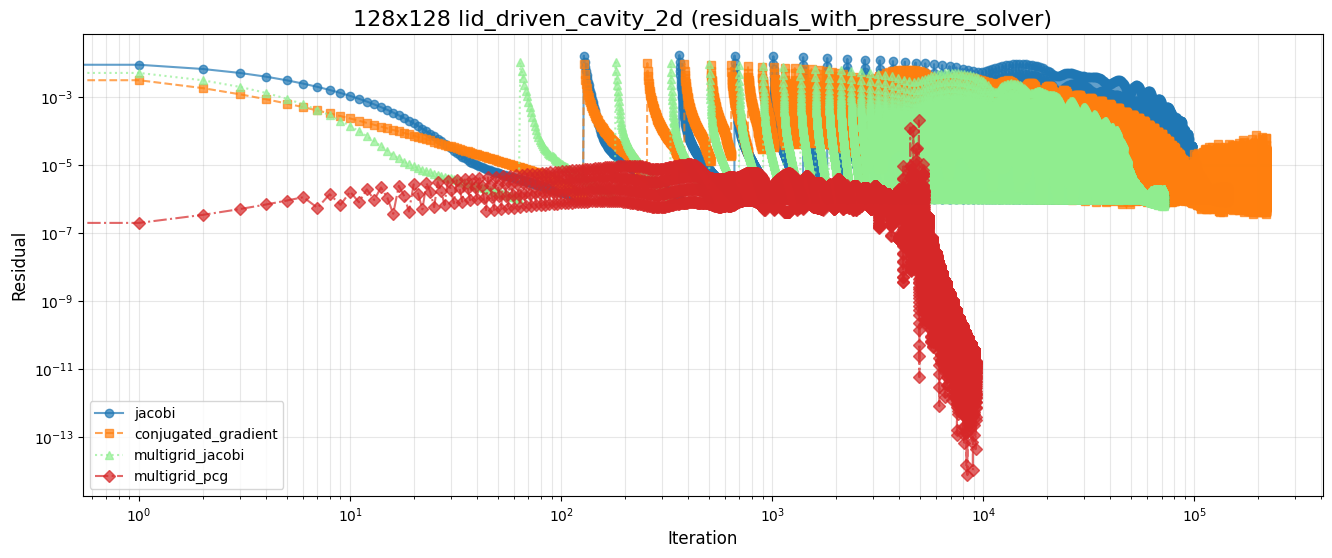

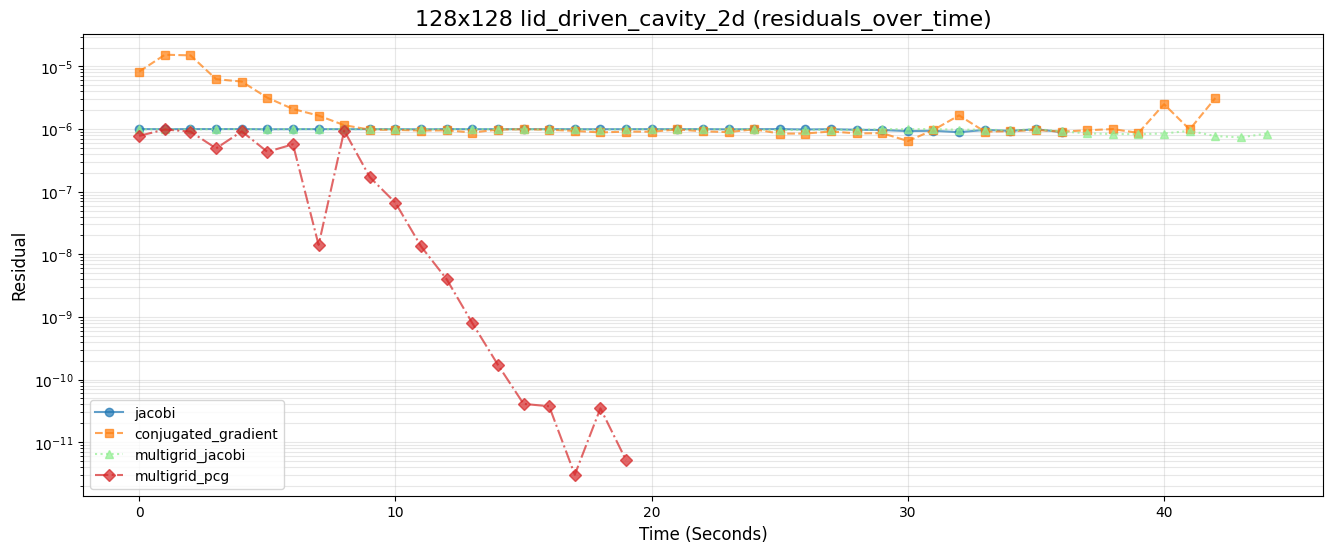

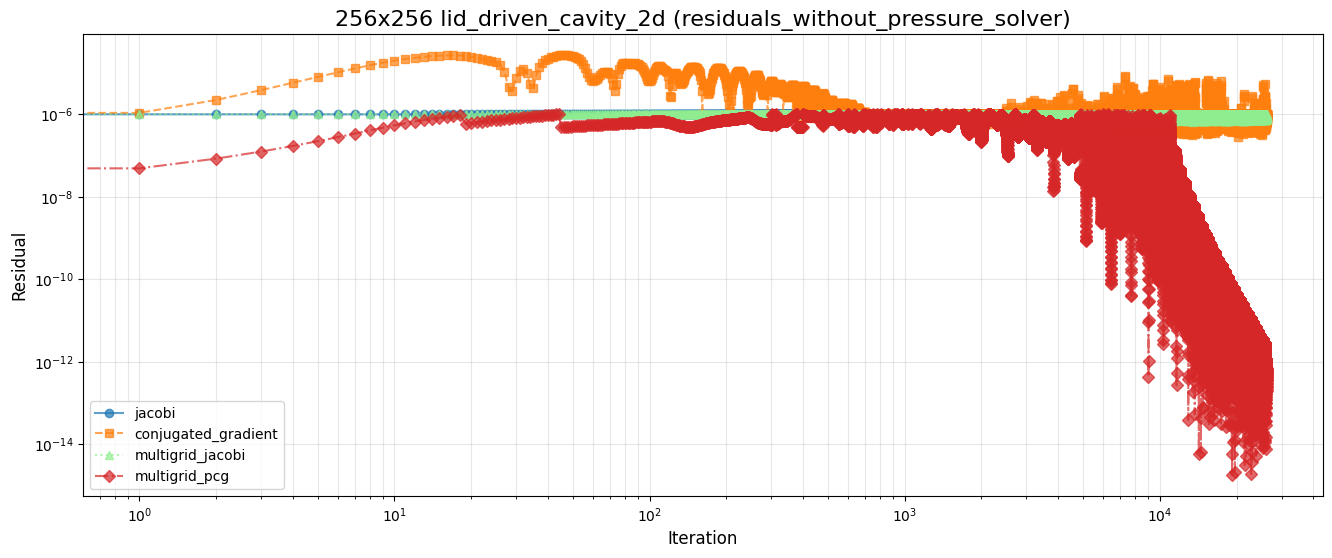

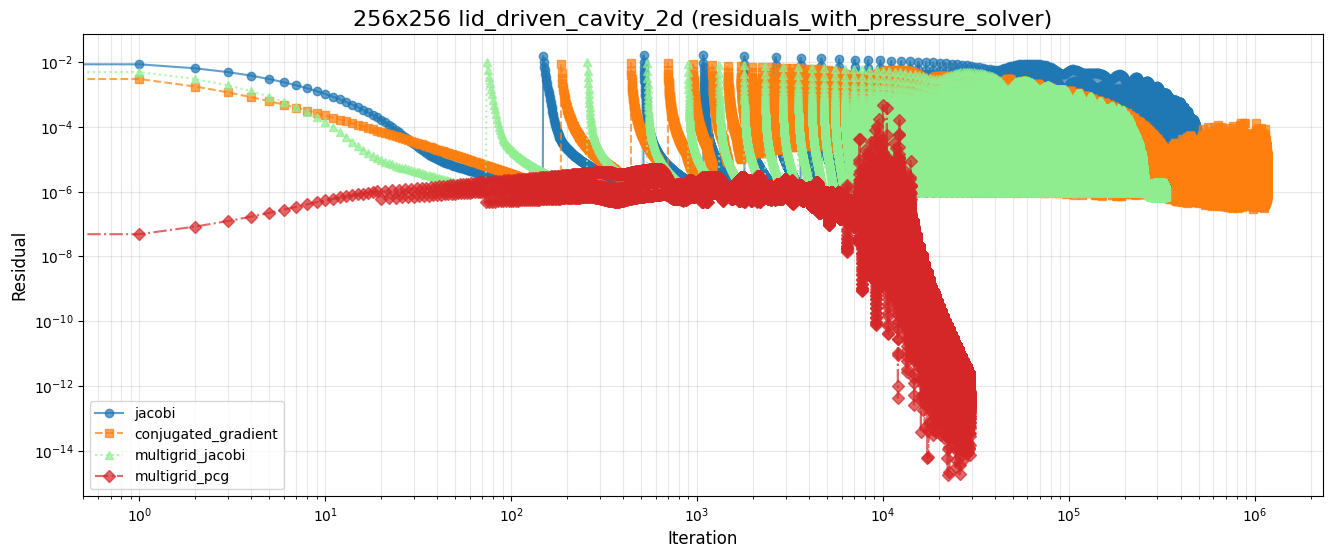

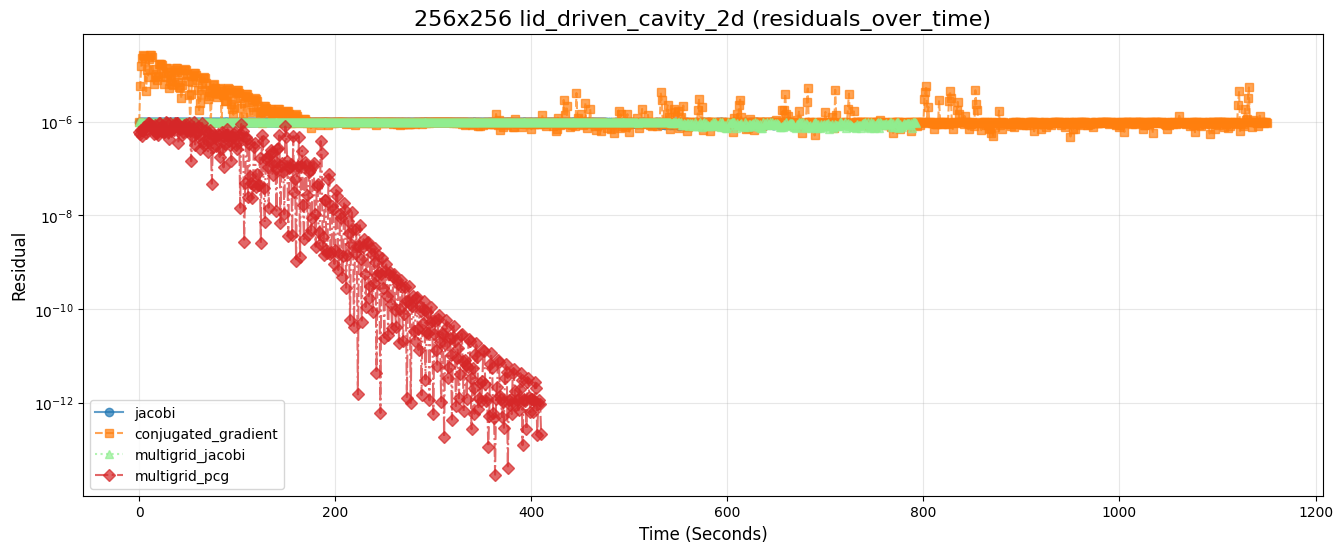

FileNotFoundError: 100/512x512/lid_driven_cavity_2d/jacobi/residuals_without_pressure_solver.dat not found.

<Figure size 1600x600 with 0 Axes>

In [4]:
benchmarks = [
    (
        '64x64', {
            'lid_driven_cavity_2d': [
                'jacobi',
                'conjugated_gradient',
                'multigrid_jacobi',
                'multigrid_pcg'
            ]
        }
    ),
    (
        '128x128', {
            'lid_driven_cavity_2d': [
                'jacobi',
                'conjugated_gradient',
                'multigrid_jacobi',
                'multigrid_pcg'
            ]
        }
    ),
    (
        '256x256', {
            'lid_driven_cavity_2d': [
                'jacobi',
                'conjugated_gradient',
                'multigrid_jacobi',
                'multigrid_pcg'
            ]
        }
    ),
    (
        '512x512', {
            'lid_driven_cavity_2d': [
                'jacobi',
                'conjugated_gradient',
                'multigrid_jacobi',
                'multigrid_pcg'
            ]
        }
    )
]

line_styles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'D']

# Create a cycle of distinct colors
colors = ['#1f77b4', '#ff7f0e', '#90ee90', '#d62728']

residuals = ['residuals_without_pressure_solver', 'residuals_with_pressure_solver', 'residuals_over_time']

for resolution, solvers_dict in benchmarks:
    for problem_name, solvers in solvers_dict.items():
        for residual in residuals:
            plt.figure(figsize=(16, 6))

            for j, solver in enumerate(solvers):
                data = np.loadtxt(f"100/{resolution}/{problem_name}/{solver}/{residual}.dat", ndmin=1)

                # select the indexes of non-zero values
                non_zero_indexes = np.nonzero(data)
                # select the non-zero values
                selected_data = data[non_zero_indexes]

                if residual != 'residuals_over_time':
                    selected_data = selected_data

                plt.plot(
                    np.arange(len(selected_data)),
                    selected_data,
                    label=solver,
                    linestyle=line_styles[j % len(line_styles)],
                    color=colors[j % len(colors)],
                    marker=markers[j % len(markers)],
                    markersize=6,
                    alpha=0.7,
                )

            plt.title(f"{resolution} {problem_name} ({residual})", fontsize=16)
            plt.xlabel("Time (Seconds)", fontsize=12)
            plt.ylabel("Residual", fontsize=12)
            if residual != 'residuals_over_time':
                plt.xlabel("Iteration", fontsize=12)
                plt.xscale('log')
            plt.yscale('log')
            plt.legend()
            plt.grid(True, which="both", ls="-", alpha=0.3)  # Adjusted grid transparency

            plt.show()
